In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [14]:
import io
data = pd.read_csv('NEW_DATASET_PREPROCESSED.csv')

In [15]:
data

,Unnamed: 0,tweet,label
0,0,a a woman you should not complain about cleani...,2
1,1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,2,dawg you ever fuck a bitch and she sta to cry ...,1
3,3,she look like a tranny,1
4,4,the shit you hear about me might be true or it...,1
...,...,...,...
71994,71994,whose twitter interest sta with food is he eve...,2
71995,71995,how did the press get the letter,2
71996,71996,sorry about your son i am sure he would not wa...,2
71997,71997,fuck alan im sorry,1


In [16]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
71994,whose twitter interest sta with food is he eve...,2
71995,how did the press get the letter,2
71996,sorry about your son i am sure he would not wa...,2
71997,fuck alan im sorry,1


In [17]:
data.dropna(inplace=True)
data.shape

(71804, 2)

In [18]:
data.label.value_counts()

1    31392
2    31105
0     7193
3     2114
Name: label, dtype: int64

In [19]:
import tensorflow as tf
import tensorflow_hub as hub

In [20]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

2021-10-30 16:28:55.988885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-30 16:28:56.891548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [21]:
y=data['label']
x=data['tweet']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

print(X_test.shape, y_test.shape)


(45954,) (45954,)
(11489,) (11489,)
(14361,) (14361,)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


In [24]:
X_train_tweet = embed(list(X_train))
X_cv_tweet = embed(list(X_cv))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)
print(X_cv_tweet.shape, y_cv.shape)
print(X_test_tweet.shape, y_test.shape)
print("="*100)

2021-10-30 16:29:00.560768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


After Embedding vectorizations
(45954, 512) (45954,)
(11489, 512) (11489,)
(14361, 512) (14361,)


In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [26]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [27]:
labels_=['hatefull','offensive','neither','Tobacco']

Start training...done!
Start testing...done!
accuracy: 0.7365782327135993
              precision    recall  f1-score   support

    hatefull       0.59      0.27      0.37      1439
   offensive       0.74      0.76      0.75      6278
     neither       0.74      0.81      0.77      6221
     Tobacco       0.95      0.90      0.92       423

    accuracy                           0.74     14361
   macro avg       0.75      0.68      0.70     14361
weighted avg       0.73      0.74      0.73     14361



/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


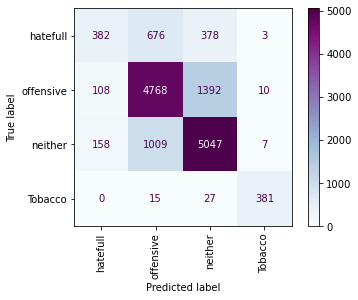

In [28]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.719796671540979
              precision    recall  f1-score   support

    hatefull       0.44      0.48      0.45      1439
   offensive       0.77      0.70      0.73      6278
     neither       0.74      0.78      0.76      6221
     Tobacco       0.81      0.96      0.88       423

    accuracy                           0.72     14361
   macro avg       0.69      0.73      0.71     14361
weighted avg       0.72      0.72      0.72     14361



/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


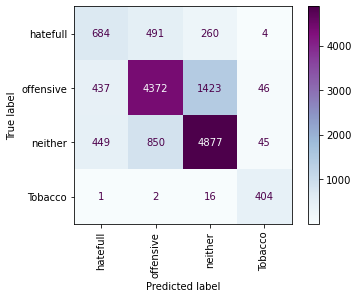

In [29]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [18]:
weights={0:0.293896844,1:0.067341997,2:0.067963349,3:1}

MODELS WITH CLASS WEIGHTS

Start training...done!
Start testing...done!
accuracy: 0.6807325395167467
              precision    recall  f1-score   support

    hatefull       0.34      0.66      0.45      1439
   offensive       0.78      0.61      0.68      6278
     neither       0.75      0.74      0.75      6221
     Tobacco       0.75      0.97      0.85       423

    accuracy                           0.68     14361
   macro avg       0.66      0.74      0.68     14361
weighted avg       0.72      0.68      0.69     14361



/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


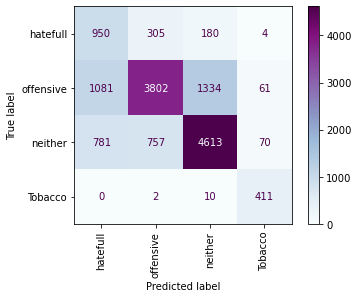

In [19]:
log_model=LogisticRegression(penalty='l2',max_iter=1000,class_weight=weights)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.708167954877794
              precision    recall  f1-score   support

    hatefull       0.41      0.46      0.43      1439
   offensive       0.76      0.69      0.72      6278
     neither       0.74      0.76      0.75      6221
     Tobacco       0.66      0.98      0.79       423

    accuracy                           0.71     14361
   macro avg       0.64      0.72      0.67     14361
weighted avg       0.71      0.71      0.71     14361



/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


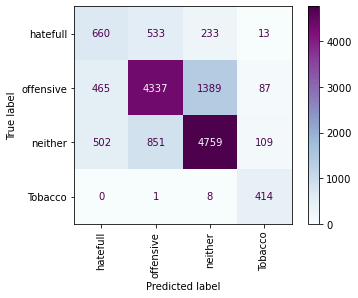

In [20]:
svm = LinearSVC(class_weight=weights, verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [21]:
from keras.layers import Input, Lambda, Dense,GRU,LSTM,Flatten
from keras.models import Model
import keras.backend as K

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71804 entries, 0 to 71998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   71804 non-null  object
 1   label   71804 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [23]:
x=data['tweet']
y=data['label']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, 
                                                y_train, 
                                                test_size=0.20, 
                                                stratify=y_train, 
                                                random_state=42)

In [25]:
print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_test.shape,y_test.shape)

(45954,) (45954,)
(11489,) (11489,)
(14361,) (14361,)


MODELS WITH NEURAL NETWORKS

In [26]:
model = tf.keras.models.Sequential()

2021-10-30 10:17:45.675703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [27]:
x = tf.keras.layers.Input(shape=[], dtype=tf.string)
y_ = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                    trainable=True)(x)
k = tf.keras.layers.Dense(256,activation='relu')(y_)
p = tf.keras.layers.Dropout(rate=0.25)(k)
z = tf.keras.layers.Dense(4, activation='softmax')(p)
model = tf.keras.models.Model(x, z)

2021-10-30 10:17:48.529639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
%%time
model.fit(x_train, 
          y_train, 
          epochs=5, 
          validation_data=(x_cv, y_cv))

Epoch 1/5


2021-10-30 10:17:51.438654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 156/1437 [==>...........................] - ETA: 41:34 - loss: 0.8255 - accuracy: 0.6727

In [ ]:
predicts=model.predict(x_test)

In [ ]:
y_predict=[np.argmax(x) for x in predicts ]
len(y_predict)

In [ ]:
y_test

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(y_test,y_predict))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicts[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 ')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [ ]:
metrics_report = classification_report(y_test, y_predict, target_names=labels_)
print(metrics_report)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu',xticklabels=labels_,yticklabels=labels_)

In [ ]:
x1 = tf.keras.layers.Input(shape=[], dtype=tf.string)
y_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                    trainable=True)(x1)
k1 = tf.keras.layers.Dense(128,activation='relu')(y_1)
p1 = tf.keras.layers.Dropout(rate=0.50)(k1)
z1 = tf.keras.layers.Dense(4, activation='softmax')(p1)
model1 = tf.keras.models.Model(x1, z1)

In [ ]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
%%time
model1.fit(x_train, 
          y_train, 
          epochs=3, 
          validation_data=(x_cv, y_cv))

In [ ]:
predicts1=model1.predict(x_test)

In [ ]:
predicts1[0]

In [ ]:
y_predict1=[np.argmax(x) for x in predicts1 ]
len(y_predict1)

In [ ]:
metrics_report1 = classification_report(y_test, y_predict1, target_names=labels_)
print(metrics_report1)

In [ ]:
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicts1[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 ')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu',xticklabels=labels_,yticklabels=labels_)

In [16]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [17]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = ["Hate",'Offensive','Neither','Tobacco']
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Epoch Done 1e-05
Epoch Done 0.0001
Epoch Done 0.001
Epoch Done 0.01
Epoch Done 0.1
Epoch Done 1
Epoch Done 10
Epoch Done 100
Epoch Done 1000
log_loss for c =  1e-05 is 0.7419861263049058
log_loss for c =  0.0001 is 0.740787758168752
log_loss for c =  0.001 is 0.7310870140867949
log_loss for c =  0.01 is 0.70357210600699
log_loss for c =  0.1 is 0.6823592144365129
log_loss for c =  1 is 0.6797930070059379
log_loss for c =  10 is 0.7105747743878594
log_loss for c =  100 is 0.7282662914766533
log_loss for c =  1000 is 0.7300435049546173


<IPython.core.display.Javascript object>

log loss for train data 0.6610091023335835
log loss for cv data 0.6797930070059379
log loss for test data 0.6767800667679092
Number of misclassified points  27.23347956270455
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


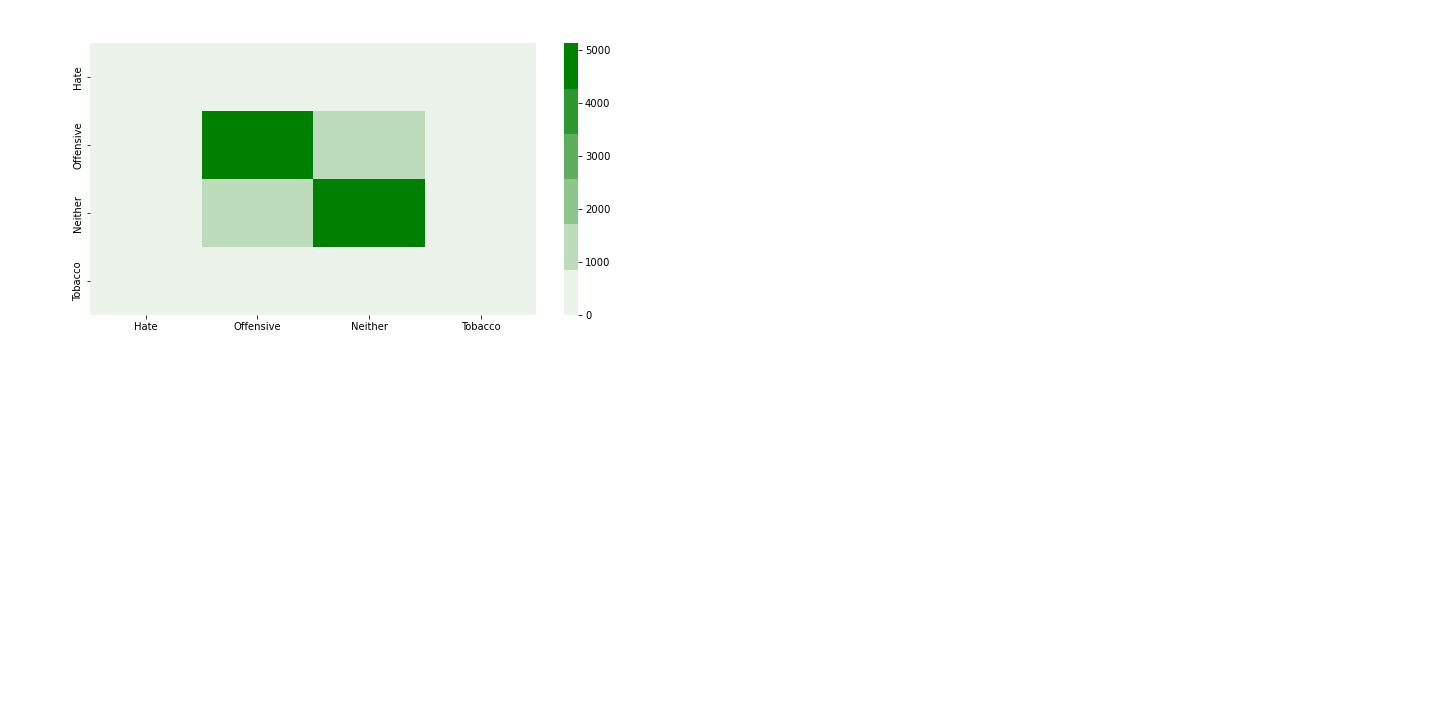

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


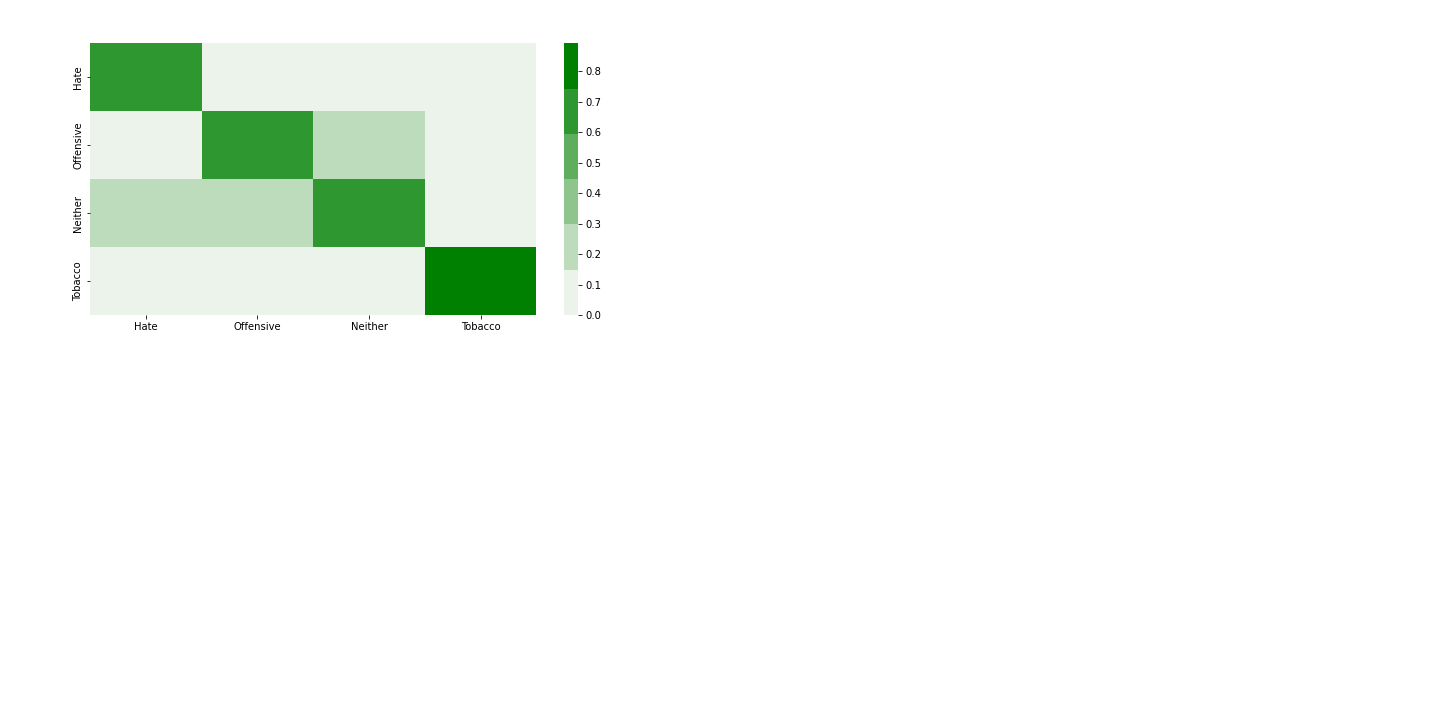

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


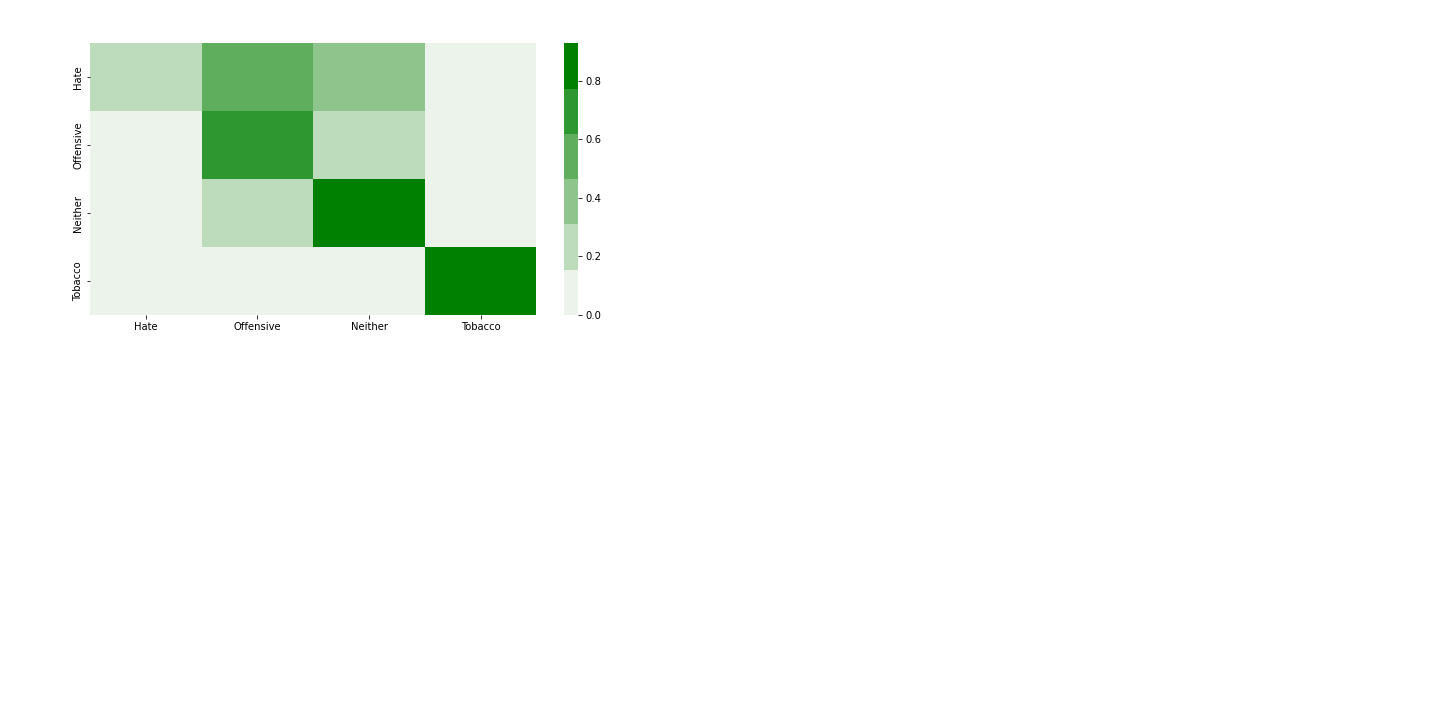

Sum of rows in precision matrix [1. 1. 1. 1.]


In [18]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_tweet,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_tweet, y_train)
    predict_y = sig_clf.predict_proba(X_cv_tweet)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    print("Epoch Done",i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_tweet,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_tweet, y_train)
pred_y=sig_clf.predict(X_test_tweet)

predict_y = sig_clf.predict_proba(X_train_tweet)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_tweet)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tweet)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_tweet))

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_tweet,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_tweet, y_train)
    predict_y = sig_clf.predict_proba(X_cv_tweet)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))
    print("Epoch Done",i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_tweet,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_tweet, y_train)

predict_y = sig_clf.predict_proba(X_train_tweet)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_tweet)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_tweet)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_tweet))

Epoch Done 10
Epoch Done 50
Epoch Done 100
Epoch Done 500
Epoch Done 1000
Epoch Done 2000
Epoch Done 3000
log_loss for c =  10 is 0.6262097133383789
log_loss for c =  50 is 0.5692576615407944
log_loss for c =  100 is 0.5610203185303709
log_loss for c =  500 is 0.554517168282215
log_loss for c =  1000 is 0.5545164123517071
log_loss for c =  2000 is 0.5538517803159324
log_loss for c =  3000 is 0.5539462587739062


<IPython.core.display.Javascript object>

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_tweet,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_tweet, y_train)
    predict_y = sig_clf.predict_proba(X_cv_tweet)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print("Epoch Done",i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_tweet,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_tweet, y_train)
    
predict_y = sig_clf.predict_proba(X_train_tweet)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_tweet)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_tweet)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_tweet))